In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold 

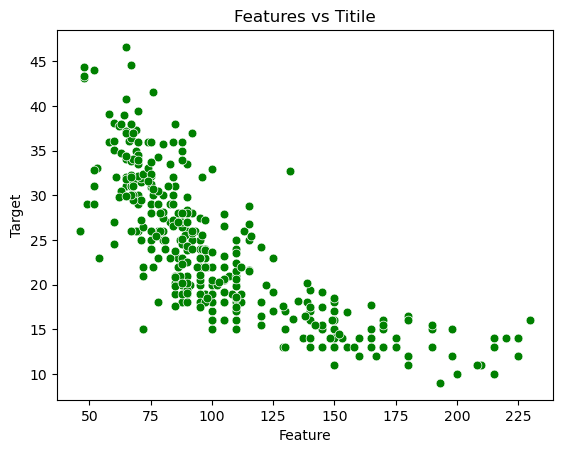

In [5]:
data=pd.read_csv('data_02b.csv')
x = data.iloc[:, 0].values.reshape(-1, 1)
y=data.iloc[:,1].values.reshape(-1,1)


sns.scatterplot(x=x.flatten(), y=y.flatten() , color='green', s=40)
plt.title('Features vs Titile')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [6]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)



Degree 1 -> Mean R2: 0.5961, Mean MSE: 24.2265
Degree 2 -> Mean R2: 0.6805, Mean MSE: 19.1764
Degree 3 -> Mean R2: 0.6802, Mean MSE: 19.1909


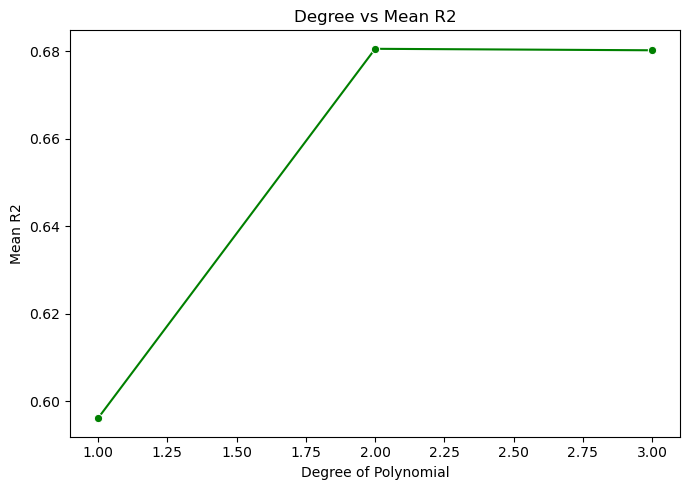

In [17]:
degrees = range(1, 4)
mean_r2_scores = []
mean_mse_scores = []

for deg in degrees:
    k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
    r2_score_array = []
    mse_score_array = []

    for train_index, test_index in k_fold.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        x_train = x_train.reshape(-1, 1)
        y_train = y_train.reshape(-1, 1)

        poly = PolynomialFeatures(degree=deg)
        x_trans = poly.fit_transform(x_train)

        model = LinearRegression()
        model.fit(x_trans, y_train)

        y_predict = model.predict(poly.transform(x_test))

        r2_score_array.append(r2_score(y_test, y_predict))
        mse_score_array.append(mean_squared_error(y_test, y_predict))

    mean_r2_scores.append(np.mean(r2_score_array))
    mean_mse_scores.append(np.mean(mse_score_array))
    
    print(f"Degree {deg} -> Mean R2: {np.mean(r2_score_array):.4f}, Mean MSE: {np.mean(mse_score_array):.4f}")

# Now only plotting Degree vs Mean R2
fig, ax = plt.subplots(figsize=(7, 5))

sns.lineplot(x=list(degrees), y=mean_r2_scores, marker='o', color='green', ax=ax)
ax.set_title('Degree vs Mean R2')
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel('Mean R2')

plt.tight_layout()
plt.show()


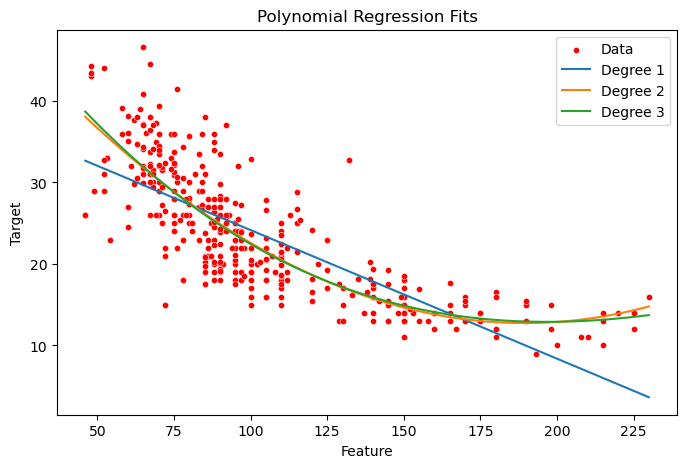

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=x.flatten(), y=y.flatten(), color='red', s=20, label='Data')

x_plot = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)  # Smooth line

for deg in range(1, 4):
    poly = PolynomialFeatures(degree=deg)
    x_trans = poly.fit_transform(x)
    model = LinearRegression()
    model.fit(x_trans, y)

    y_pred_plot = model.predict(poly.transform(x_plot))
    plt.plot(x_plot, y_pred_plot, label=f'Degree {deg}')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression Fits')
plt.legend()
plt.show()


/tmp/ipykernel_10192/237257528.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[1,2,3], y=mean_mse_scores,palette='viridis')


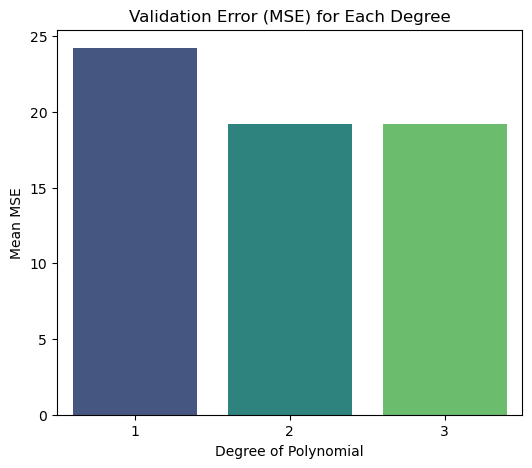

In [21]:
plt.figure(figsize=(6,5))
sns.barplot(x=[1,2,3], y=mean_mse_scores,palette='viridis')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean MSE')
plt.title('Validation Error (MSE) for Each Degree')
plt.show()


In [22]:
best_degree = np.argmin(mean_mse_scores) + 1 

poly = PolynomialFeatures(degree=best_degree)
x_trans = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_trans, y)

print(f"\nBest degree: {best_degree}")
print(f"Model parameters (coefficients): {model.coef_}")
print(f"Model intercept: {model.intercept_}")



Best degree: 2
Model parameters (coefficients): [[ 0.         -0.46656709  0.00123188]]
Model intercept: [56.92052668]
